In [2]:
# Load the datasets from the uploaded files
import pandas as pd

# File paths from user-uploaded data
mat_file_path = "./data/student-mat.csv"
por_file_path = "./data/student-por.csv"

# Reading the CSV files
student_mat = pd.read_csv(mat_file_path, sep=';')
student_por = pd.read_csv(por_file_path, sep=';')

# Displaying the first few rows of both datasets to verify loading
student_mat.head(), student_por.head()


(  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
 0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
 1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
 2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
 3     GP   F   15       U     GT3       T     4     2   health  services  ...   
 4     GP   F   16       U     GT3       T     3     3    other     other  ...   
 
   famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
 0      4        3      4     1     1      3        6   5   6   6  
 1      5        3      3     1     1      3        4   5   5   6  
 2      4        3      2     2     3      3       10   7   8  10  
 3      3        2      2     1     1      5        2  15  14  15  
 4      4        3      2     1     2      5        4   6  10  10  
 
 [5 rows x 33 columns],
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjo

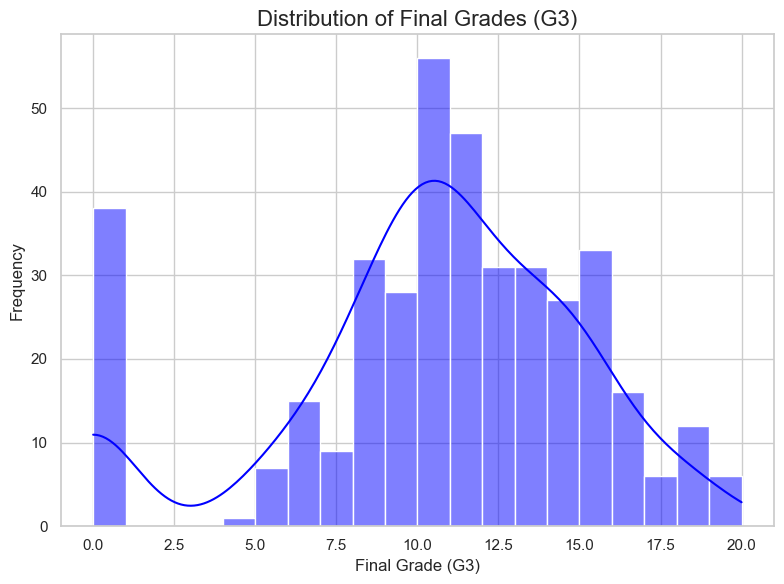

C:\Users\Yuval\AppData\Local\Temp\ipykernel_11288\333736021.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=student_mat, palette='Set2')


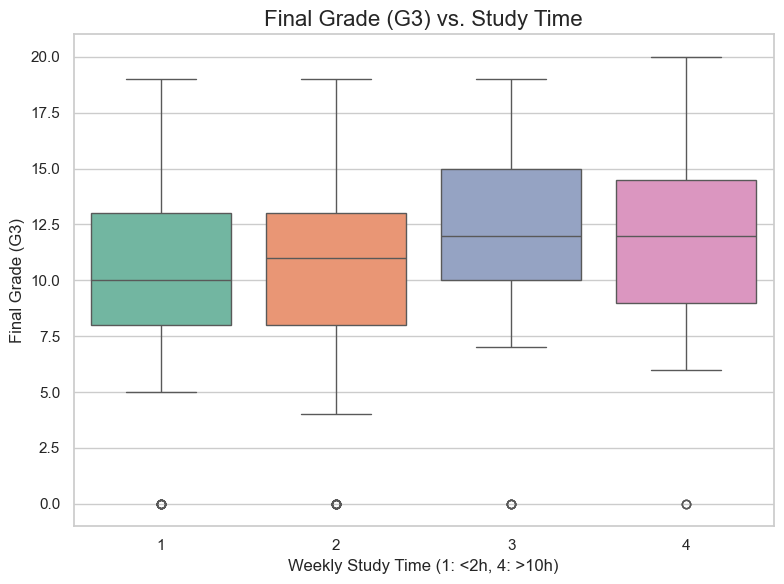

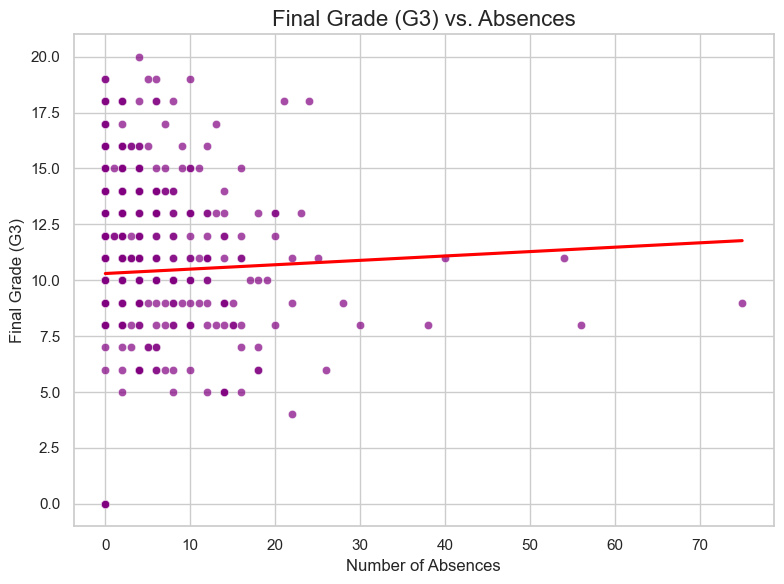

C:\Users\Yuval\AppData\Local\Temp\ipykernel_11288\333736021.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ParentalEducation', y='G3', data=parent_edu, ci=None, palette='Set3')
C:\Users\Yuval\AppData\Local\Temp\ipykernel_11288\333736021.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ParentalEducation', y='G3', data=parent_edu, ci=None, palette='Set3')


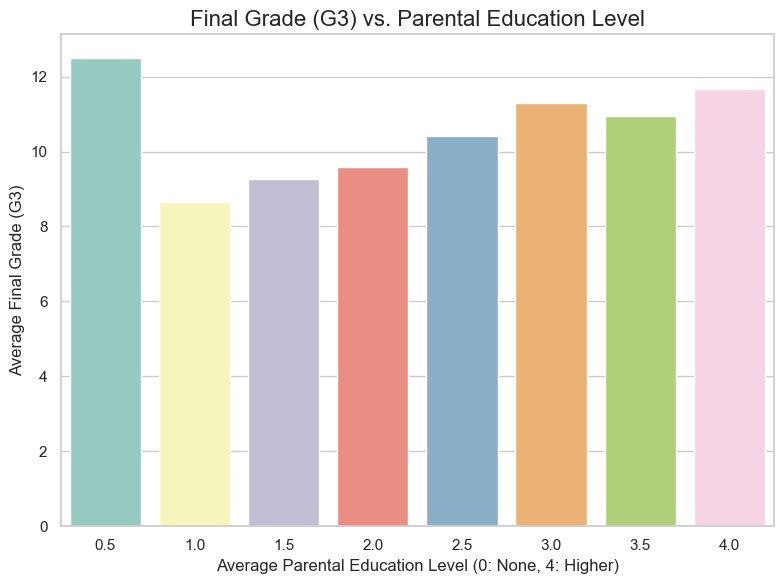

C:\Users\Yuval\AppData\Local\Temp\ipykernel_11288\333736021.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='internet', y='G3', data=student_mat, palette='muted')


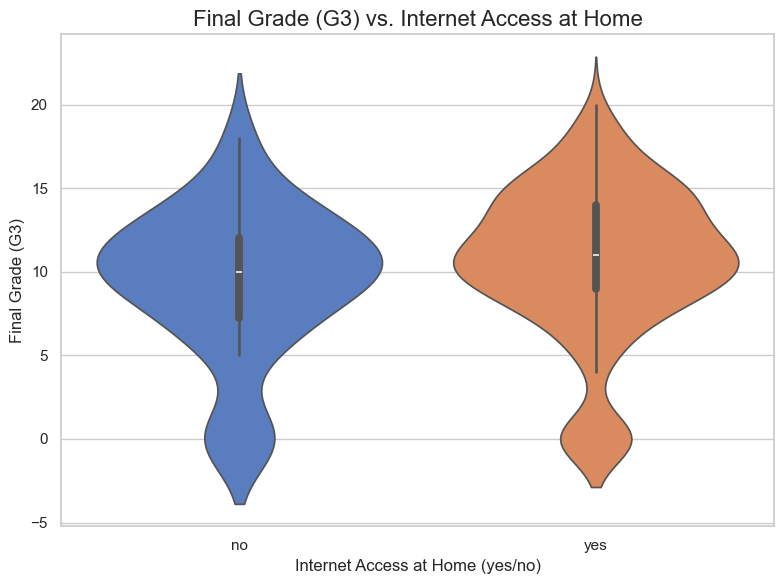

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all plots
sns.set(style="whitegrid")

# 1. Distribution of Final Grades (G3)
plt.figure(figsize=(8, 6))
sns.histplot(student_mat['G3'], bins=20, kde=True, color='blue')
plt.title('Distribution of Final Grades (G3)', fontsize=16)
plt.xlabel('Final Grade (G3)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# 2. Final Grade (G3) vs. Study Time
plt.figure(figsize=(8, 6))
sns.boxplot(x='studytime', y='G3', data=student_mat, palette='Set2')
plt.title('Final Grade (G3) vs. Study Time', fontsize=16)
plt.xlabel('Weekly Study Time (1: <2h, 4: >10h)', fontsize=12)
plt.ylabel('Final Grade (G3)', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Final Grade (G3) vs. Absences
plt.figure(figsize=(8, 6))
sns.scatterplot(x='absences', y='G3', data=student_mat, color='purple', alpha=0.7)
sns.regplot(x='absences', y='G3', data=student_mat, scatter=False, color='red', ci=None)
plt.title('Final Grade (G3) vs. Absences', fontsize=16)
plt.xlabel('Number of Absences', fontsize=12)
plt.ylabel('Final Grade (G3)', fontsize=12)
plt.tight_layout()
plt.show()

# 4. Final Grade (G3) vs. Parental Education Level
plt.figure(figsize=(8, 6))
parent_edu = student_mat[['Medu', 'Fedu', 'G3']].assign(
    ParentalEducation=(student_mat['Medu'] + student_mat['Fedu']) / 2
)
sns.barplot(x='ParentalEducation', y='G3', data=parent_edu, ci=None, palette='Set3')
plt.title('Final Grade (G3) vs. Parental Education Level', fontsize=16)
plt.xlabel('Average Parental Education Level (0: None, 4: Higher)', fontsize=12)
plt.ylabel('Average Final Grade (G3)', fontsize=12)
plt.tight_layout()
plt.show()

# 5. Final Grade (G3) vs. Internet Access at Home
plt.figure(figsize=(8, 6))
sns.violinplot(x='internet', y='G3', data=student_mat, palette='muted')
plt.title('Final Grade (G3) vs. Internet Access at Home', fontsize=16)
plt.xlabel('Internet Access at Home (yes/no)', fontsize=12)
plt.ylabel('Final Grade (G3)', fontsize=12)
plt.tight_layout()
plt.show()


In [3]:
!pip install seaborn


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

# Prepare the data
X = student_mat.drop(columns=['G3'])  # Features
y = student_mat['G3']  # Target

# Encode categorical variables
categorical_columns = X.select_dtypes(include='object').columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the model
model = XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Visualize residuals
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of the Model')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


ModuleNotFoundError: No module named 'xgboost'

Mean Absolute Error (MAE): 1.1050632911392408
Mean Squared Error (MSE): 3.4867417721518983
R² Score: 0.8299569015097052


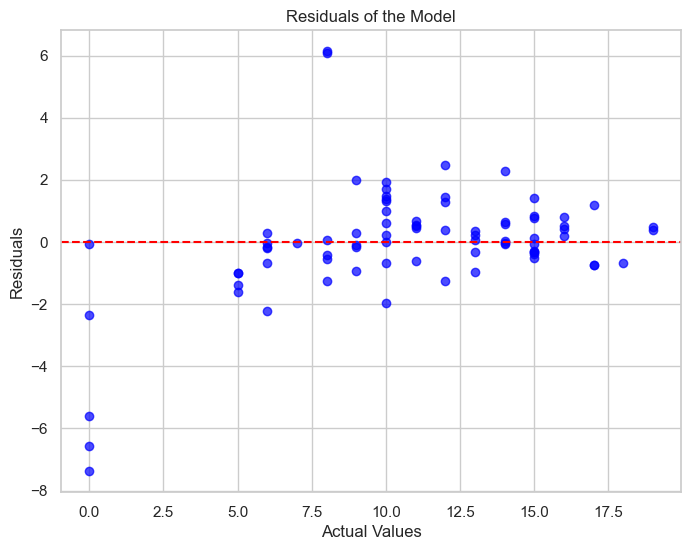

In [6]:
# Since xgboost is not installed, let's use a simpler model, e.g., RandomForestRegressor, for the pipeline.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Prepare the data
X = student_mat.drop(columns=['G3'])  # Features
y = student_mat['G3']  # Target

# Encode categorical variables
categorical_columns = X.select_dtypes(include='object').columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the RandomForest model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Visualize residuals
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of the Model')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


In [ ]:
!conda install -c conda-forge xgboost
